In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('bc_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(df['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [5]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.drop(columns='Unnamed: 32', axis = 1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df = df.drop(columns='Unnamed: 32', axis = 1)

In [8]:
df.loc[df['diagnosis']=='M', 'diagnosis'] = 1
df.loc[df['diagnosis']=='B', 'diagnosis'] = 0

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

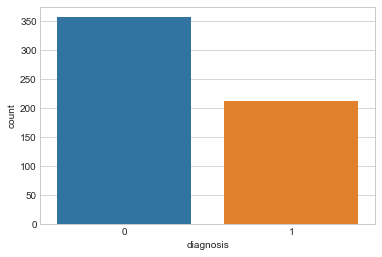

In [98]:
sns.countplot(x='diagnosis', data = df)

In [10]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [11]:
y = df['diagnosis']

In [12]:
y1 = y.to_numpy()

In [13]:
x = df.drop(columns=['id', 'diagnosis'], axis = 1)

In [14]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [106]:
dfcp = x

c:\Python39\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


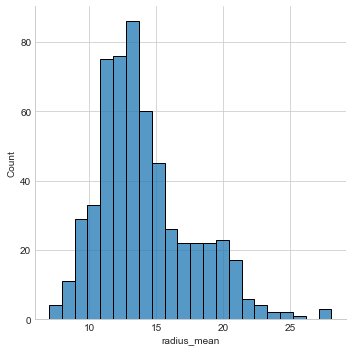

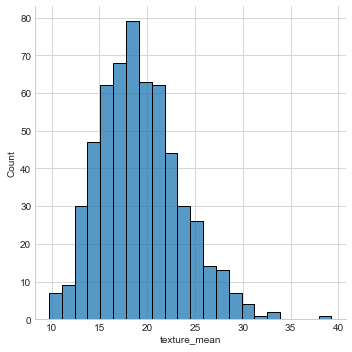

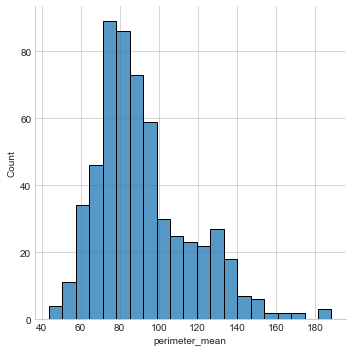

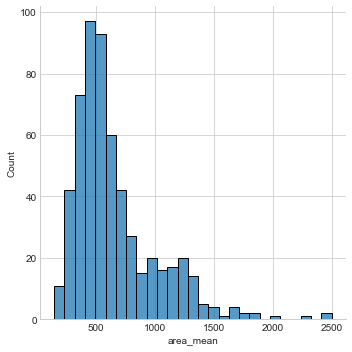

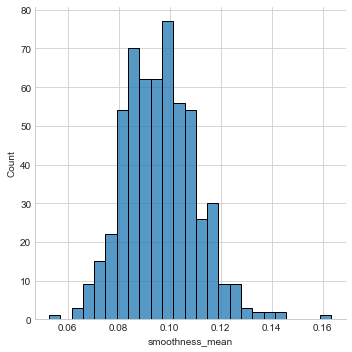

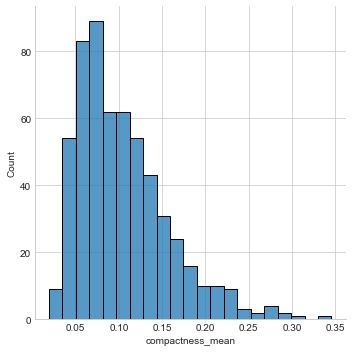

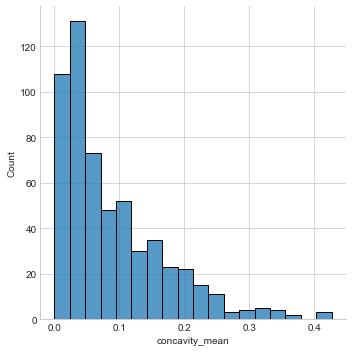

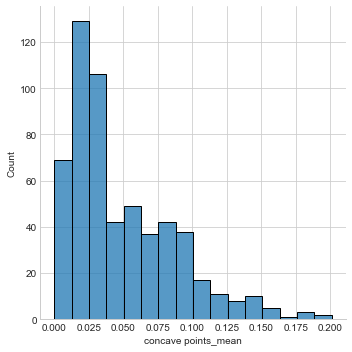

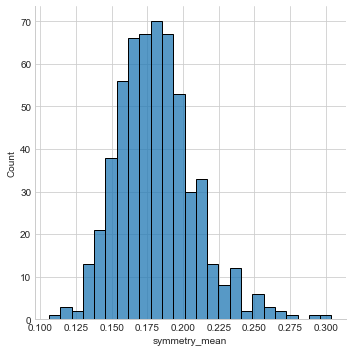

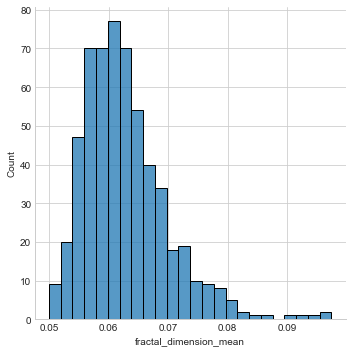

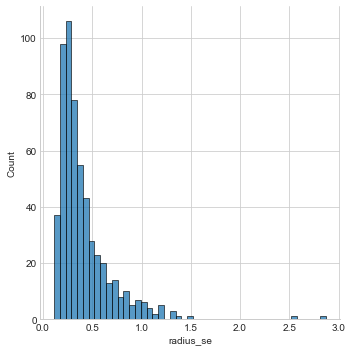

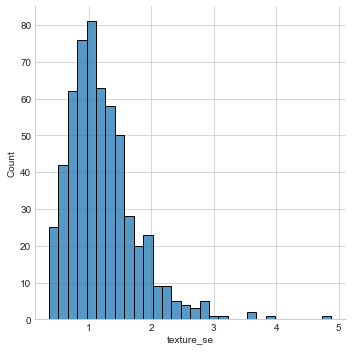

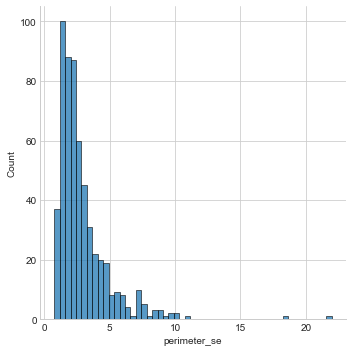

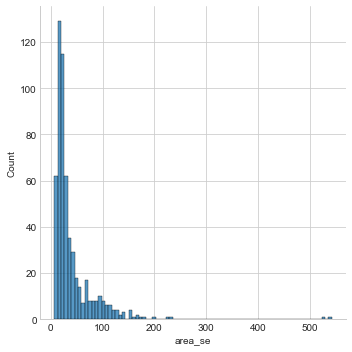

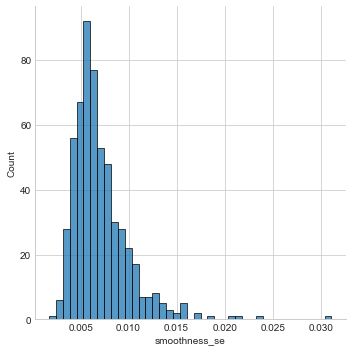

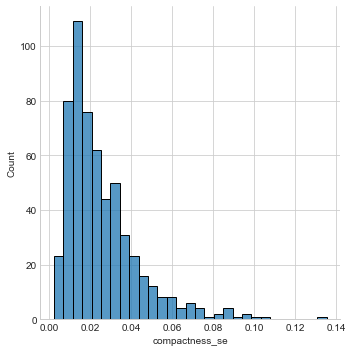

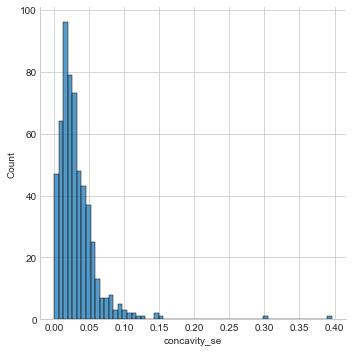

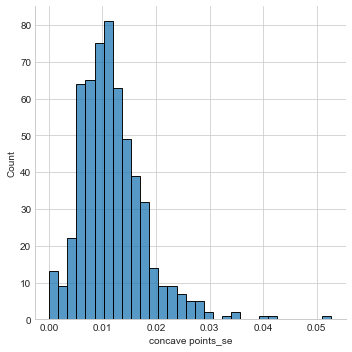

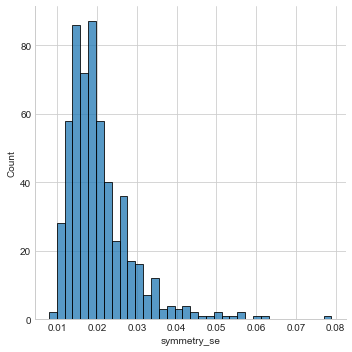

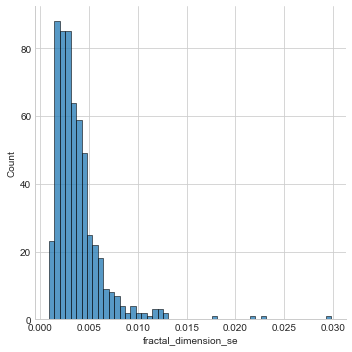

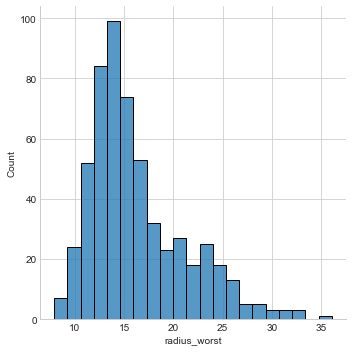

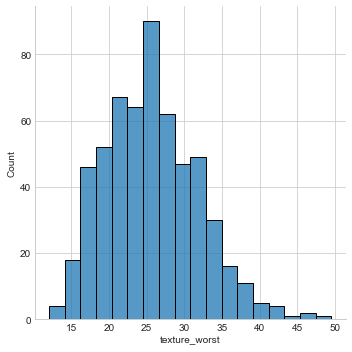

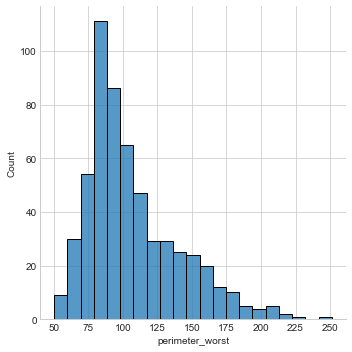

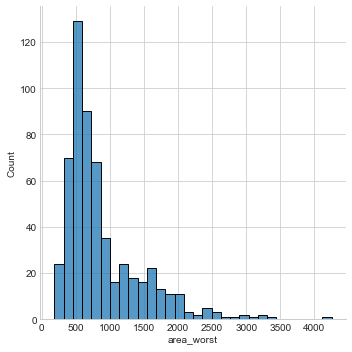

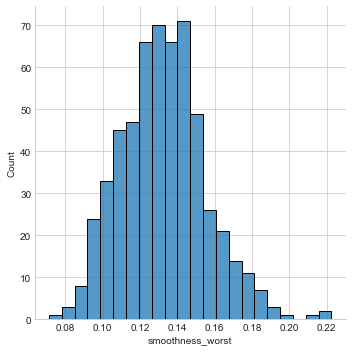

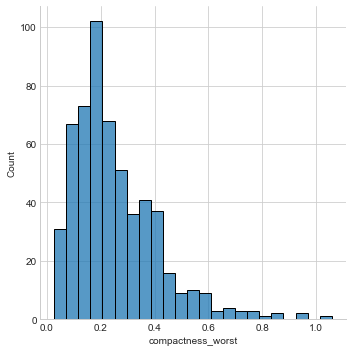

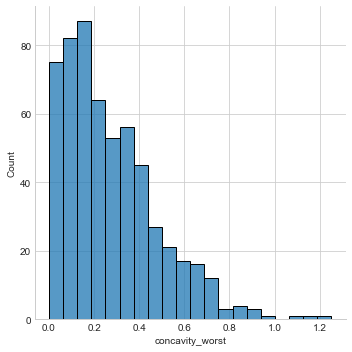

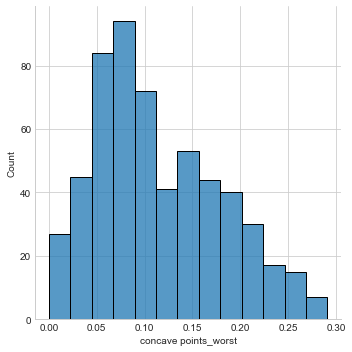

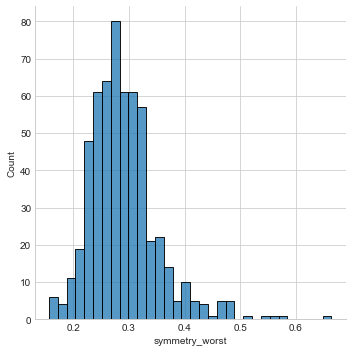

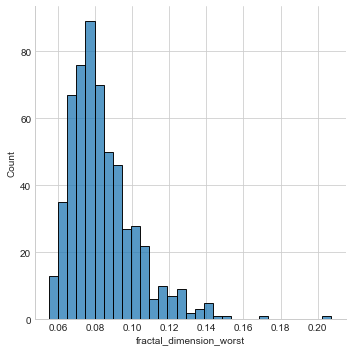

In [107]:
for column in dfcp.keys():
    sns.displot(x = column, data = dfcp)

In [15]:
df.shape

(569, 32)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [18]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
df.groupby(df['diagnosis']).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [20]:
x.shape

(569, 30)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [22]:
print(x.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [23]:
model = LogisticRegression()

In [43]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [37]:
model.fit(X_train, Y_train)

c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
X_train_prediction = model.predict(X_train)
accuracy = accuracy_score(X_train_prediction, Y_train)

In [50]:
print(f"accuracy on training data is: {accuracy}")

accuracy on training data is: 0.9494505494505494


In [49]:
X_test_prediction = model.predict(X_test)
accuracy2 = accuracy_score(X_test_prediction, Y_test)

In [52]:
print(f"accuracy on testing data is: {accuracy2}")

accuracy on testing data is: 0.9210526315789473


In [53]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


In [54]:
model2 = DecisionTreeClassifier()

In [55]:
model2.fit(X_train, Y_train)

DecisionTreeClassifier()

In [56]:
X_train_prediction2 = model2.predict(X_train)
accuracy11 = accuracy_score(X_train_prediction2, Y_train)

In [57]:
print(f'accuracy on training data using decision tree classifier is: {accuracy11}')

accuracy on training data using decision tree classifier is: 1.0


In [58]:
X_test_prediction2 = model2.predict(X_test)
accuracy12 = accuracy_score(X_test_prediction2, Y_test)

In [59]:
print(f'accuracy on testing data using decision tree classifier is: {accuracy12}')

accuracy on testing data using decision tree classifier is: 0.9298245614035088


In [60]:
from sklearn.ensemble import GradientBoostingClassifier


In [61]:
model3 = GradientBoostingClassifier()

In [62]:
model3.fit(X_train, Y_train)

GradientBoostingClassifier()

In [69]:
X_train_prediction3 = model3.predict(X_train)
accuracy31 = accuracy_score(X_train_prediction3, Y_train)
print(f'The accuracy score of XGBOOST ALGORITHM ON TRAINING DATA IS: {accuracy31}')

The accuracy score of XGBOOST ALGORITHM ON TRAINING DATA IS: 1.0


In [73]:
X_train_prediction31 = model3.predict(X_test)
accuracy32 = accuracy_score(X_train_prediction31, Y_test)
print(f'The accuracy score of XGBOOST ALGORITHM ON TESTING DATA IS: {accuracy32}')

The accuracy score of XGBOOST ALGORITHM ON TRAINING DATA IS: 0.9298245614035088


In [66]:
from sklearn import svm


In [67]:
model4 = svm.SVC(kernel='linear')

In [68]:
model4.fit(X_train, Y_train)

SVC(kernel='linear')

In [74]:
X_train_prediction4 = model4.predict(X_train)
accuracy41 = accuracy_score(X_train_prediction4, Y_train)
print(f'The accuracy score of SVM ALGORITHM ON TRAINING DATA IS: {accuracy41}')

The accuracy score of XGBOOST ALGORITHM ON TRAINING DATA IS: 0.9692307692307692


In [76]:
X_train_prediction41 = model4.predict(X_test)
accuracy42 = accuracy_score(X_train_prediction41, Y_test)
print(f'The accuracy score of SVM ALGORITHM ON TRAINING DATA IS: {accuracy42}')

The accuracy score of SVM ALGORITHM ON TRAINING DATA IS: 0.9473684210526315


In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [109]:
import tensorflow as tf

In [112]:
tf.random.set_seed(3)
from tensorflow import keras

In [127]:
model5 = keras.Sequential([
                            keras.layers.Flatten(input_shape = (30,)),
                            keras.layers.Dense(20, activation='relu'),
                            keras.layers.Dense(2, activation = 'sigmoid')
                        ])

In [128]:
model5.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

In [129]:
history = model5.fit(X_train_std, Y_train, validation_split=0.1, epochs = 10)

Epoch 1/10


13/13 [==============================] - 1s 19ms/step - loss: 0.6570 - accuracy: 0.6284 - val_loss: 0.4575 - val_accuracy: 0.7826
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4661 - accuracy: 0.7824 - val_loss: 0.3322 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3486 - accuracy: 0.8557 - val_loss: 0.2629 - val_accuracy: 0.9348
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2808 - accuracy: 0.8900 - val_loss: 0.2199 - val_accuracy: 0.9348
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2360 - accuracy: 0.9169 - val_loss: 0.1913 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2055 - accuracy: 0.9267 - val_loss: 0.1711 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1824 - accuracy: 0.9413 - val_loss: 0.1556 - val_accuracy: 0.9783
Epoch 8/10
13/13 [============

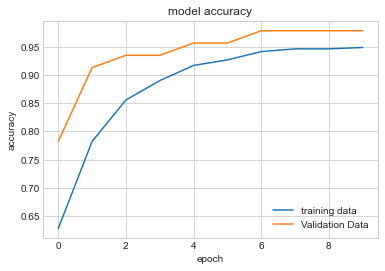

In [130]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'Validation Data'], loc = 'lower right')


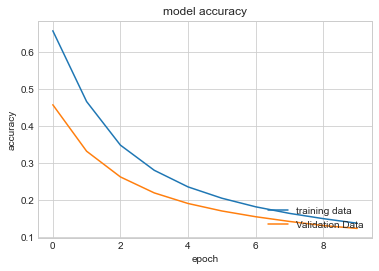

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'Validation Data'], loc = 'lower right')


BUILDING A PREDICTIVE SYSTEM

In [133]:
loss, accuracy = model5.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.1311 - accuracy: 0.9474
0.9473684430122375


In [135]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [136]:
Y_pred = model5.predict(X_test_std)

4/4 [==============================] - 0s 2ms/step


In [137]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.55083984 0.4434076 ]


In [138]:
y_pred_labels = [np.argmax(i) for i in Y_pred]

In [139]:
y_pred_labels

[0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1]